# House Prices 분석 및 예측
* https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

* Data fields의 설명들은 위의 주소를 통해 확인하실 수 있습니다.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.formula.api import ols

* 회귀분석을 위한 ols import

In [ ]:
data=pd.read_csv('House_train.csv')

In [ ]:
test_data=pd.read_csv('House_test.csv')

<ipython-input-2219-d19f0945bfc5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'], fit=norm, ax=ax1)#분포확인 왜도
<ipython-input-2219-d19f0945bfc5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data['SalePrice']+1), fit=norm, ax=ax2)#왜도 해결 Log취함


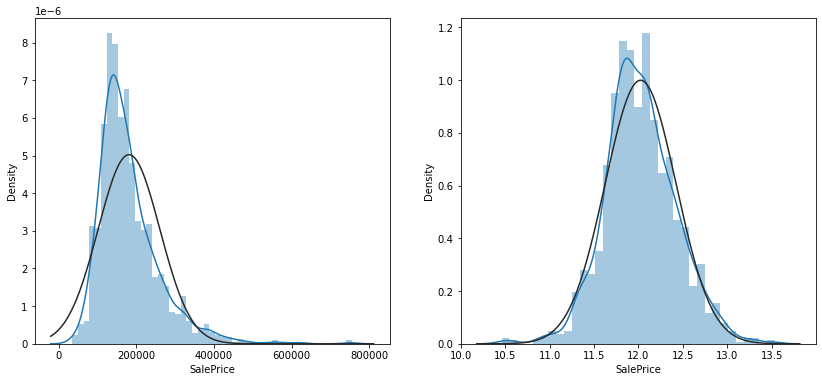

In [ ]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.distplot(data['SalePrice'], fit=norm, ax=ax1)#분포확인 왜도 
sns.distplot(np.log(data['SalePrice']+1), fit=norm, ax=ax2)#왜도 해결 Log취함

* SalePrice의 분포를 확인하고 왜도 해결을 위해 Log를 취해줬습니다.
* log를 취해주니 왜도가 어느정도 해결되어 보입니다.

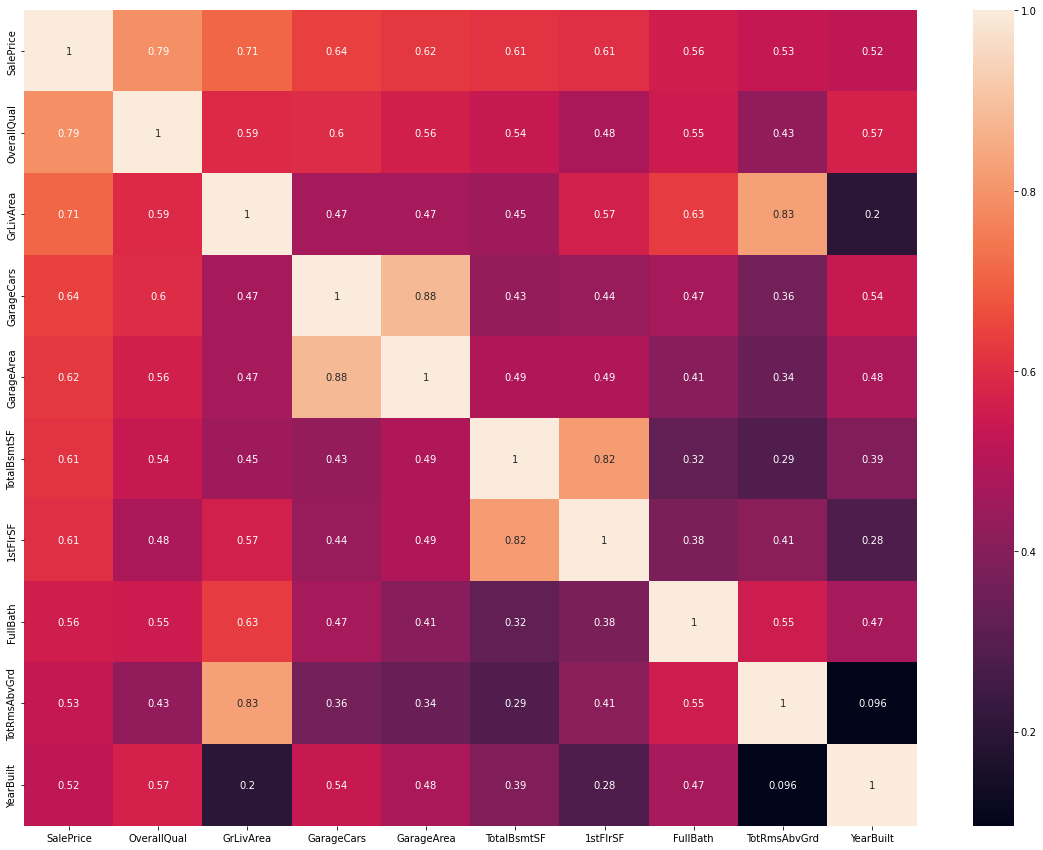

In [ ]:
corr=data.corr()
top_corr=data[corr.nlargest(10,'SalePrice')['SalePrice'].index].corr()
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20,15)
sns.heatmap(top_corr, annot=True, ax=ax1)

* 상관계수를 확인하기 위해 heatmap을 통해 표현하였습니다.



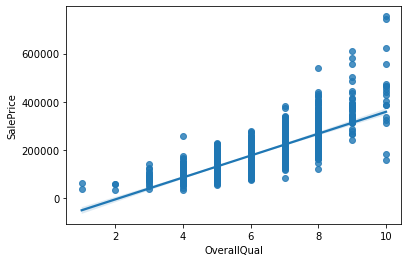

In [ ]:
sns.regplot(x=data['OverallQual'], y=data['SalePrice'])

* OverallQual에 따른 가격의 분포를 확인해 보았습니다.

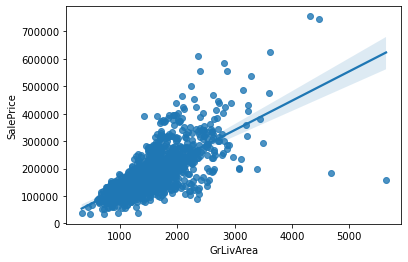

In [ ]:
sns.regplot(x=data['GrLivArea'], y=data['SalePrice'])

* GrLivArea에 따른 가격 분포를 확인해 보았습니다.

* 위 데이터의 오른쪽 아래를 보면 2개의 노이즈 데이터가 존재하는걸 확인할 수 있습니다.

In [ ]:
data[data['GrLivArea']>4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [ ]:
data.drop(data[(data.Id==524)|(data.Id==1299)].index,inplace=True)

* 2개의 outlier를 제거해주었습니다.

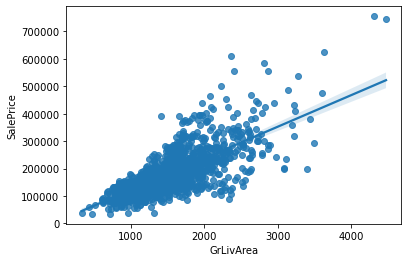

In [ ]:
sns.regplot(x=data['GrLivArea'], y=data['SalePrice'])

In [ ]:
Y=data['SalePrice']

In [ ]:
data=data[list(test_data)]

In [ ]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [ ]:
total_data=pd.concat((data, test_data), axis=0)

In [ ]:
Y=np.log(Y+1)

* 위에 그래프에서 왜도를 해결하기 위해 log를 취했던 것 처럼 y data값에 log를 취했습니다.

In [ ]:
Y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1458, dtype: float64

In [ ]:
data_col=list(total_data)
for col in list(total_data):
    if (total_data[col].isnull().sum())==0:
        data_col.remove(col)
    else:
        pass
print(len(data_col)) #34개열에 결측치가 존재함

34


In [ ]:
data_col

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [ ]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    total_data[col] = total_data[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea','LotFrontage'):
    total_data[col] = total_data[col].fillna(0)
    
for col in ('MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional', 'Utilities'):
    total_data[col] = total_data[col].fillna(total_data[col].mode()[0])

* 첫번째는 집에 해당 시설물이 없는 경우 (범주형 변수), 이때는 결측치를 'None' 이라는 문자열로 채웠습니다다.
* 두번째는 집에 해당 시설물이 없는 경우(수치형 변수), 이때는 결측치를 0으로 채웠습니다. 차고면적=0 이면 차고 없음 이런식으로 생각할 수 있습니다.
* 세번째는 해당 시설물이 없다고 보기 힘든 경우에 있는 결측치, 이때는 결측치를 해당 열의 최빈값으로 채웁니다. 집에 외벽 시설이 없을리는 없고, 집이 판매가 되었는데 거래 타입이 정해지지 않을리는 없기에 최빈값으로 채웠습니다.

In [ ]:
total_data['TotalSF']=total_data['TotalBsmtSF'] + total_data['1stFlrSF'] + total_data['2ndFlrSF'] #총면적
total_data['No2ndFlr']=(total_data['2ndFlrSF']==0) #2층이 없는 경우
total_data['NoBsmt']=(total_data['TotalBsmtSF']==0) #지하실이 없는 경우

* 지하실, 1층, 2층 면적을 모두 합한 '총 면적' 이란 변수를 추가로 만들었습니다.
* 총면적이 증가하면 집값이 더 비싸진다고 볼 수 있습니다.

In [ ]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(14,10)
sns.regplot(data['TotalBsmtSF'], data['SalePrice'], ax=ax1)
sns.regplot(data['1stFlrSF'], data['SalePrice'], ax=ax2)
sns.regplot(data['2ndFlrSF'], data['SalePrice'], ax=ax3)
sns.regplot(data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF'], data['SalePrice'], ax=ax4)

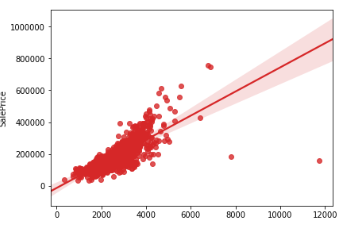

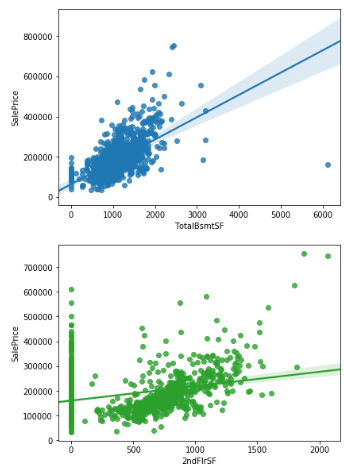

* 추가로 'No2ndFlr' 과 'NoBsmt' 라는 변수를 만들어서 2층 없음, 지하실 없음 여부를 나타낼 수 있도록 했습니다. 

* 2층면적을 나타내는 초록 그래프를 보면, 나타나있는 직선이 점들과 별로 맞지 않는 것처럼 보입니다. 그이유는 저 그래프의 0들 때문이라고 생각했습니다
* 이 0들을 따로 분리해낸다면 조금더 나은 그래프를 그릴 수 있지않을까 생각했습니다.

In [ ]:
total_data['TotalBath']=total_data['BsmtFullBath'] + total_data['FullBath'] + (total_data['BsmtHalfBath']/2) + (total_data['HalfBath']/2)

* 욕실 갯수는 'FullBath' 와 'HalfBath', 그리고 지하에 있는지 여부, 총 4개 열로 이루어져있었는데, 이들을 모두 더해 하나로 만들어 보았습니다. FullBath 는 욕조 및 샤워 시설이 포함되어있는 욕실이고, HalfBath는 변기와 세면대 정도 있는 간단한 욕실을 말한다. 이름에 맞게 FullBath는 1개로 카운트하고, HalfBath 는 0.5개로 카운트해서 모두 더했더니 다음과 같은 그래프를 얻을 수 있었습니다.

In [ ]:
figure, (ax5) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(14,6)
sns.barplot(data['BsmtFullBath'] + data['FullBath'] + (data['BsmtHalfBath']/2) + (data['HalfBath']/2), data['SalePrice'], ax=ax5)

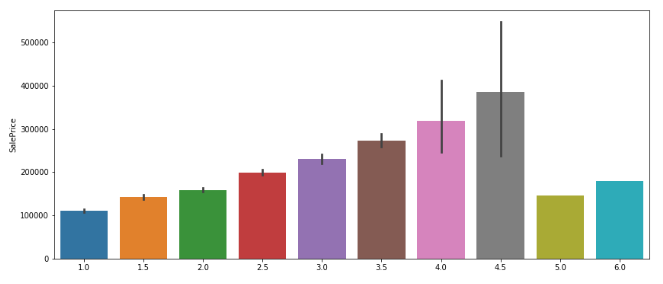

* 이를 보면 욕실 수가 많을수록 더 집값이 비싸진다고 볼 수 있다. (더 큰 집일수록 욕실수가 많을 것이라 생각합니다).
* 하지만 여기서 특이한 점이 하나 있는데, 욕실 갯수가 5개, 6개인 집들은 막대그래프 위의 검정 세로선이 보이지 않습니다.
* 이유가 뭘까? 할 수도 있지만, 저 검정 선은 편차를 의미합니다. 그렇다면 편차가 없다는것이 무슨뜻이지? 값이 다른 데이터가 두개만 있어도 편차가 발생할텐데?
* 화장실 갯수가 5개, 6개인 집은 각각 하나씩밖에 없다는 뜻으로 볼 수 있습니다. 이들은 역시 outlier 로 판단하였습니다.

In [ ]:
Basement = ['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtUnfSF', 'TotalBsmtSF']
Bsmt=total_data[Basement] #지하관련 변수들

* 지하 즉 지하실에 해당하는 변수들을 묶어서 저장하였습니다.

In [ ]:
Bsmt=Bsmt.replace(to_replace='Po', value=1)
Bsmt=Bsmt.replace(to_replace='Fa', value=2)
Bsmt=Bsmt.replace(to_replace='TA', value=3)
Bsmt=Bsmt.replace(to_replace='Gd', value=4)
Bsmt=Bsmt.replace(to_replace='Ex', value=5)
Bsmt=Bsmt.replace(to_replace='None', value=0)

Bsmt=Bsmt.replace(to_replace='No', value=1)
Bsmt=Bsmt.replace(to_replace='Mn', value=2)
Bsmt=Bsmt.replace(to_replace='Av', value=3)
Bsmt=Bsmt.replace(to_replace='Gd', value=4)

Bsmt=Bsmt.replace(to_replace='Unf', value=1)
Bsmt=Bsmt.replace(to_replace='LwQ', value=2)
Bsmt=Bsmt.replace(to_replace='Rec', value=3)
Bsmt=Bsmt.replace(to_replace='BLQ', value=4)
Bsmt=Bsmt.replace(to_replace='ALQ', value=5)
Bsmt=Bsmt.replace(to_replace='GLQ', value=6)

* 이후 범주값들을 encoding 해주었습니다.
* kaggle 페이지의 데이터 설명란을 보면 각각의 값이 좋은지 혹은 나쁜건지를 알려주는데 나쁜값에는 낮은 level을 값이 좋다면 높은 level을 주었고 값이 아예 없는 경우에는 0을 주었습니다.

In [ ]:
Bsmt['BsmtScore']= Bsmt['BsmtQual']  * Bsmt['BsmtCond'] * Bsmt['TotalBsmtSF']
total_data['BsmtScore']=Bsmt['BsmtScore']

Bsmt['BsmtFin'] = (Bsmt['BsmtFinSF1'] * Bsmt['BsmtFinType1']) + (Bsmt['BsmtFinSF2'] * Bsmt['BsmtFinType2'])
total_data['BsmtFinScore']=Bsmt['BsmtFin']
total_data['BsmtDNF']=(total_data['BsmtFinScore']==0)

* 이후 몇개 항목들을 곱해서 지하실의 전반적인 상태를 전체적으로 평가할 수 있는 변수 BsmtScore를 만들었습니다.

* BsmtFin의 경우에는 지하실이 공사중이라면 총 완성될 면적과 상태를 포함해주는 변수입니다.

* 'BsmtFinScore' 은 지하실의 완성도 점수, 'BsmtScore' 은 지하실의 종합 점수, 'BsmtDNF' 는 지하실의 미완성 여부를 나타내는 변수입니다. 

In [ ]:
lot=['LotFrontage', 'LotArea','LotConfig','LotShape']
Lot=total_data[lot]

Lot['LotScore'] = np.log((Lot['LotFrontage'] * Lot['LotArea'])+1)

total_data['LotScore']=Lot['LotScore']

<ipython-input-2244-c70cdc96feb0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lot['LotScore'] = np.log((Lot['LotFrontage'] * Lot['LotArea'])+1)


* 토지면적과 모양 접근성 등등을 고려할 수 있는 LotScore를 만들었고
* 여기서 LotFronttage와 LotArea의 값이 너무 커 해당 값들 때문에 너무 치우치치 않도록 log를 취해주었습니다.

In [ ]:
garage=['GarageArea','GarageCars','GarageCond','GarageFinish','GarageQual','GarageType','GarageYrBlt']
Garage=total_data[garage]
total_data['NoGarage']=(total_data['GarageArea']==0)

In [ ]:
Garage=Garage.replace(to_replace='Po', value=1)
Garage=Garage.replace(to_replace='Fa', value=2)
Garage=Garage.replace(to_replace='TA', value=3)
Garage=Garage.replace(to_replace='Gd', value=4)
Garage=Garage.replace(to_replace='Ex', value=5)
Garage=Garage.replace(to_replace='None', value=0)

Garage=Garage.replace(to_replace='Unf', value=1)
Garage=Garage.replace(to_replace='RFn', value=2)
Garage=Garage.replace(to_replace='Fin', value=3)

Garage=Garage.replace(to_replace='CarPort', value=1)
Garage=Garage.replace(to_replace='Basment', value=4)
Garage=Garage.replace(to_replace='Detchd', value=2)
Garage=Garage.replace(to_replace='2Types', value=3)
Garage=Garage.replace(to_replace='Basement', value=5)
Garage=Garage.replace(to_replace='Attchd', value=6)
Garage=Garage.replace(to_replace='BuiltIn', value=7)

Garage['GarageScore']=(Garage['GarageArea']) * (Garage['GarageCars']) * (Garage['GarageFinish']) * (Garage['GarageQual']) * (Garage['GarageType'])
total_data['GarageScore']=Garage['GarageScore']

* 차고에 대해서도 동일한 방법으로 진행했습니다.

In [ ]:
total_data=total_data.drop(columns=['Street','Utilities','Condition2','RoofMatl','Heating'])

* 비정상적으로 하나의 값만 많은 변수들은 삭제하였습니다.

In [ ]:
total_data=total_data.drop(columns=['PoolArea','PoolQC'])

* 빈값이 너무 많은 변수들은 제거하였습니다.  (수영장이 있는 집)

In [ ]:
total_data=total_data.drop(columns=['MiscVal','MiscFeature'])

* * 빈값이 너무 많은 변수들은 제거하였습니다.  (테니스 코트가 있는 집)

In [ ]:
non_numeric=total_data.select_dtypes(np.object)

<ipython-input-2252-1921265870b5>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  non_numeric=total_data.select_dtypes(np.object)


* object형식의 행들을 담아주었습니다.

In [ ]:
def onehot(col_list):
    global total_data
    while len(col_list) !=0:
        col=col_list.pop(0)
        data_encoded=pd.get_dummies(total_data[col], prefix=col)
        total_data=pd.concat([total_data, data_encoded],axis=1)
        total_data=total_data.drop(columns=col)
    print(total_data.shape)


* 범주형 변수들을 위한 onehot encoding을 위한 함수를 제작하였습니다.

In [ ]:
non_numeric

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,Attchd,RFn,TA,TA,Y,None,2,2008,WD,Normal
1,20,RL,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,...,Attchd,RFn,TA,TA,Y,None,5,2007,WD,Normal
2,60,RL,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,Attchd,RFn,TA,TA,Y,None,9,2008,WD,Normal
3,70,RL,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,...,Detchd,Unf,TA,TA,Y,None,2,2006,WD,Abnorml
4,60,RL,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,...,Attchd,RFn,TA,TA,Y,None,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Twnhs,...,None,None,None,None,Y,None,6,2006,WD,Normal
1455,160,RM,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,TwnhsE,...,CarPort,Unf,TA,TA,Y,None,4,2006,WD,Abnorml
1456,20,RL,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,...,Detchd,Unf,TA,TA,Y,None,9,2006,WD,Abnorml
1457,85,RL,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,...,None,None,None,None,Y,MnPrv,7,2006,WD,Normal


In [ ]:
onehot(list(non_numeric))

(2917, 310)


* 범주값들은 onhot encoding 해주었습니다.

In [ ]:
total_data

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
numeric=total_data.select_dtypes(np.number)

def log_transform(col_list):
    transformed_col=[]
    while len(col_list)!=0:
        col=col_list.pop(0)
        if total_data[col].skew() > 0.5:
            total_data[col]=np.log(total_data[col]+1)
            transformed_col.append(col)
        else:
            pass
    print(f"{len(transformed_col)} features had been tranformed")
    print(total_data.shape)

log_transform(list(numeric))

255 features had been tranformed
(2917, 310)


* 수치형 변수는 비대칭이 너무 심해지지않도록 왜도가 크게 되어있는 데이터들에만 로그를 씌워 변환해주었습니다.

In [ ]:
total_data

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,9.042040,7,1.791759,2003,2003,5.283204,6.561031,0.0,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
1,2,80.0,9.169623,6,2.197225,1976,1976,0.000000,6.886532,0.0,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
2,3,68.0,9.328212,7,1.791759,2001,2002,5.093750,6.188264,0.0,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
3,4,60.0,9.164401,7,1.791759,1915,1970,0.000000,5.379897,0.0,...,0.0,0.0,0.0,1,0.693359,0.0,0.0,0.0,0,0.0
4,5,84.0,9.565284,8,1.791759,2000,2000,5.860786,6.486161,0.0,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,21.0,7.568896,4,2.079442,1970,1970,0.000000,0.000000,0.0,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
1455,2916,21.0,7.546974,4,1.791759,1970,1970,0.000000,5.533389,0.0,...,0.0,0.0,0.0,1,0.693359,0.0,0.0,0.0,0,0.0
1456,2917,160.0,9.903538,5,2.079442,1960,1996,0.000000,7.110696,0.0,...,0.0,0.0,0.0,1,0.693359,0.0,0.0,0.0,0,0.0
1457,2918,62.0,9.253591,5,1.791759,1992,1992,0.000000,5.823046,0.0,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0


In [ ]:
data.shape

(1458, 80)

In [ ]:
Xtrain=total_data[:len(data)]
Xtest=total_data[len(data):]

In [ ]:
params_dict={'n_estimators':[1000],'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(Xtrain,Y)


C:\Users\ehdgn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\ehdgn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\ehdgn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1000], 'n_jobs': [-1]},
             scoring='neg_mean_squared_log_error')

* GridSearchCV를 사용하여 최적의 Parameters를 찾아 적용하였습니다.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error,mean_squared_error

In [ ]:
pred=clf_rf.predict(Xtest)

* RandomForestReressor model을 test data에 적용시켜 예측하였습니다.

In [ ]:
pred

array([11.7120967 , 11.93258815, 12.13622635, ..., 11.8639837 ,
       11.6519918 , 12.33899264])

In [ ]:
final_pred=np.exp(pred)-1

* 처음에 취해줬던 log값의 변환을 위해 exp를 진행하였습니다.

In [ ]:
final_pred

array([122038.09270677, 152143.82685013, 186506.42806441, ...,
       142056.00491633, 114919.03348505, 228430.72422678])

In [ ]:
submission=pd.read_csv('House_submission.csv')

In [ ]:
submission['SalePrice']=final_pred

In [ ]:
submission.to_csv('House_submission.csv',index=False)

In [ ]:
submission

,Id,SalePrice
0,1461,122038.092707
1,1462,152143.826850
2,1463,186506.428064
3,1464,183286.831900
4,1465,192825.400068
...,...,...
1454,2915,85729.424120
1455,2916,86105.371013
1456,2917,142056.004916
1457,2918,114919.033485


* 제출결과 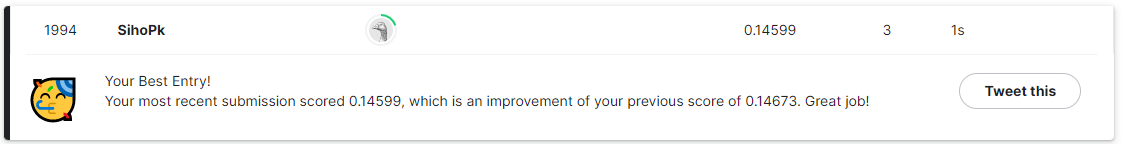

* 0.14599점으로 1994등이 나왔습니다.